In [1]:
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dowjones_closing = pd.read_csv(r"C:\Users\pc\PycharmProjects\Netology\Homework\timeseries\Series\weekly-closings-of-the-dowjones-.csv")

In [3]:
all_series = {
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
}

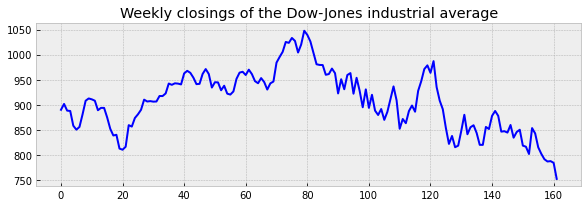

In [4]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

In [5]:
Weekly_closings_of_the_Dow_Jones_industrial_average = boxcox(all_series["Weekly closings of the Dow-Jones industrial average"], 0)

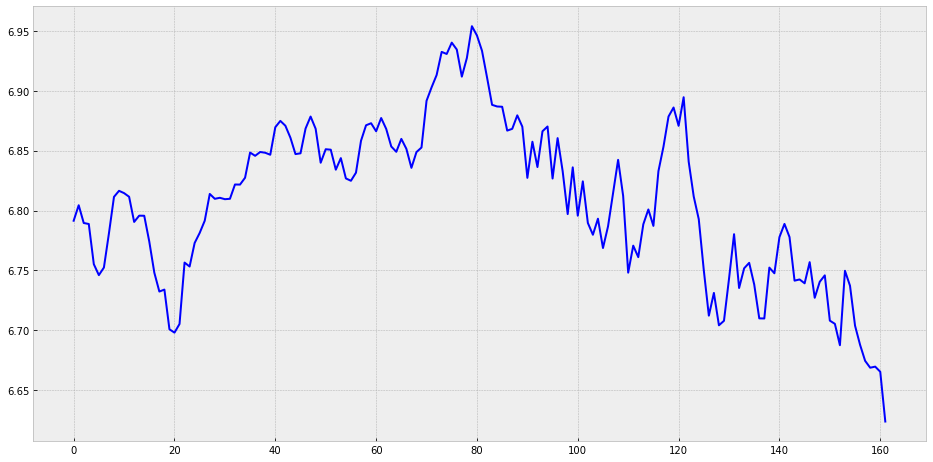

In [6]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(Weekly_closings_of_the_Dow_Jones_industrial_average, color='blue')


In [7]:
day = 1
week = 7
month = 12
days = 30

In [8]:
Weekly_closings_of_the_Dow_Jones_industrial_average = Weekly_closings_of_the_Dow_Jones_industrial_average[week:] - Weekly_closings_of_the_Dow_Jones_industrial_average[:-week]

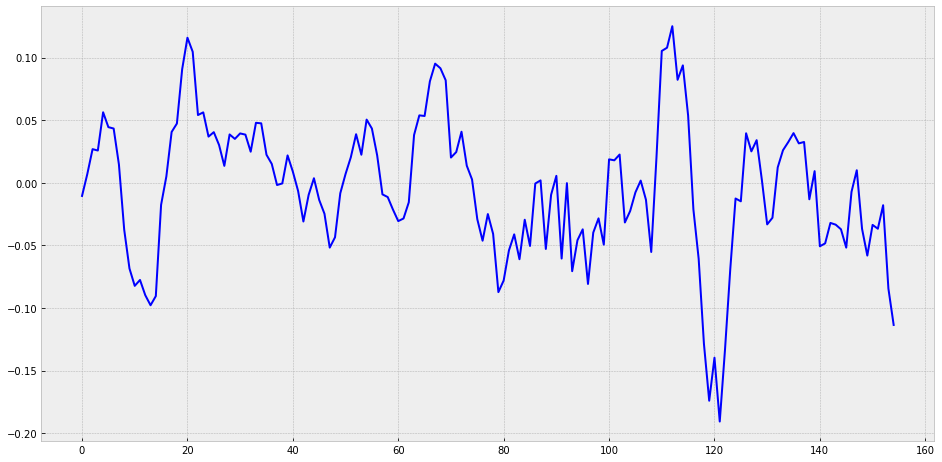

In [9]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(Weekly_closings_of_the_Dow_Jones_industrial_average, color='blue')

In [10]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [11]:
test_stationarity(Weekly_closings_of_the_Dow_Jones_industrial_average)

Results of Dickey-Fuller Test:
Test Statistic                  -3.411420
p-value                          0.010576
#Lags Used                       0.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64


p:\python 384 64bit\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
